<a href="https://colab.research.google.com/github/prityd825/Machine_Learning_code/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
heart = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_heart.csv")

In [ ]:
heart.head(10)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [ ]:
print("Number of rows: ",heart.shape[0])

Number of rows:  270


In [ ]:
print("Number of Columns: ", heart.shape[1])

Number of Columns:  14


In [ ]:
heart.isnull().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64

In [ ]:
heart.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
age,270.000000,54.433333,9.109067,29.000000,48.000000,55.000000,61.000000,77.000000
sex,270.000000,0.677778,0.468195,0.000000,0.000000,1.000000,1.000000,1.000000
chest pain type,270.000000,3.174074,0.950090,1.000000,3.000000,3.000000,4.000000,4.000000
resting blood pressure,270.000000,131.344444,17.861608,94.000000,120.000000,130.000000,140.000000,200.000000
serum cholestoral,270.000000,249.659259,51.686237,126.000000,213.000000,245.000000,280.000000,564.000000
fasting blood sugar,270.000000,0.148148,0.355906,0.000000,0.000000,0.000000,0.000000,1.000000
resting electrocardiographic results,270.000000,1.022222,0.997891,0.000000,0.000000,2.000000,2.000000,2.000000
max heart rate,270.000000,149.677778,23.165717,71.000000,133.000000,153.500000,166.000000,202.000000
exercise induced angina,270.000000,0.329630,0.470952,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,270.000000,1.050000,1.145210,0.000000,0.000000,0.800000,1.600000,6.200000


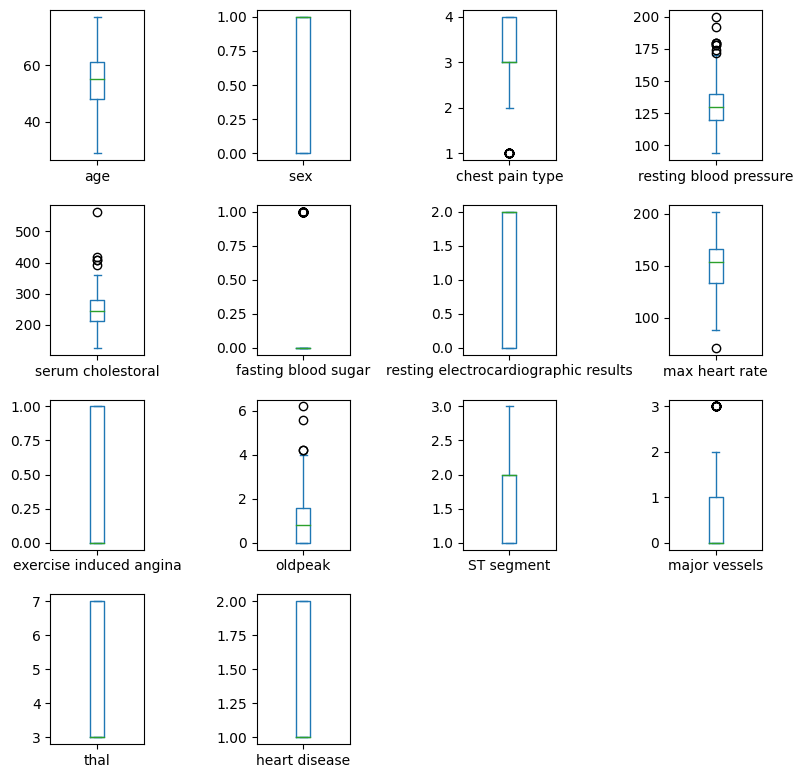

In [ ]:
names = ['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease']

# Set the custom font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Create the box plots
heart.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(8, 8), y=names)

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

In [ ]:
print(heart['heart disease'].value_counts())

1    150
2    120
Name: heart disease, dtype: int64


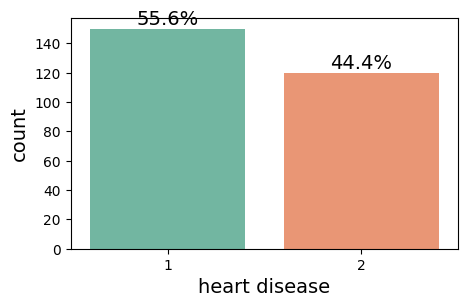

In [ ]:
plt.figure(figsize=(5,3),dpi=100)
ax = sns.countplot(data=heart, x='heart disease', palette="Set2")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(heart)), (x.mean(), y),
            ha='center', va='bottom')

In [ ]:
X=heart.drop('heart disease',axis=1)
y=heart['heart disease']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(270, 13) (216, 13) (54, 13)


In [ ]:
from sklearn.preprocessing import StandardScaler
df2 = heart.copy()
ss = StandardScaler()
df2[['age', 'resting blood pressure','serum cholestoral', 'max heart rate','oldpeak']] = ss.fit_transform(df2[['age','resting blood pressure','serum cholestoral', 'max heart rate','oldpeak']])

In [ ]:
for col in heart.columns:
    if heart[col].dtypes != 'object':
        lower_limit, upper_limit = heart[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        heart[col] = np.where(heart[col]>upper_whisker,upper_whisker,np.where(heart[col]<lower_whisker,lower_whisker,heart[col]))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
knn =KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
print('K-Nearest Neighbors  Test Accuracy ', accuracy_score(y_test, y_pred ))

y_pred = logreg.predict(X_test)
print('Logistic Regression Test Accuracy ', accuracy_score(y_test, y_pred ))

y_pred = dt.predict(X_test)
print('Decision Tree Test Accuracy ', accuracy_score(y_test, y_pred ))

y_pred = rf.predict(X_test)
print('Random Forest Test Accuracy ', accuracy_score(y_test, y_pred ))

K-Nearest Neighbors  Test Accuracy  0.7222222222222222
Logistic Regression Test Accuracy  0.8518518518518519
Decision Tree Test Accuracy  0.7592592592592593
Random Forest Test Accuracy  0.8333333333333334


In [ ]:
from sklearn.metrics import classification_report

def plot_classification_report(y_train, y_pred1, y_test, y_pred2, c_name):
    print("-"*25,c_name,"(Test SET)","-"*25)
    print(classification_report(y_test, y_pred2))

In [ ]:
c_name= "K-Nearest Neighbors"
plot_classification_report(y_train, knn.predict(X_train), y_test, knn.predict(X_test), c_name)

c_name= "Logistic Regression"
plot_classification_report(y_train, logreg.predict(X_train), y_test, logreg.predict(X_test), c_name)

c_name= "Decision Tree"
plot_classification_report(y_train, dt.predict(X_train), y_test, dt.predict(X_test), c_name)

c_name= "Random Forest"
plot_classification_report(y_train, rf.predict(X_train), y_test, rf.predict(X_test), c_name)

------------------------- K-Nearest Neighbors (Test SET) -------------------------
              precision    recall  f1-score   support

           1       0.76      0.73      0.75        30
           2       0.68      0.71      0.69        24

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54

------------------------- Logistic Regression (Test SET) -------------------------
              precision    recall  f1-score   support

           1       0.89      0.83      0.86        30
           2       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54

------------------------- Decision Tree (Test SET) -------------------------
              precision    recall  f1-score   support

           1       0.81      0.73      0.77     

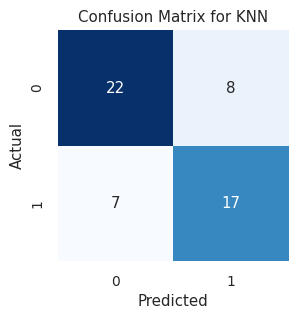

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion=confusion_matrix(y_test, knn.predict(X_test))
plt.figure(figsize=(4, 3))
sns.set(font_scale=.9)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()


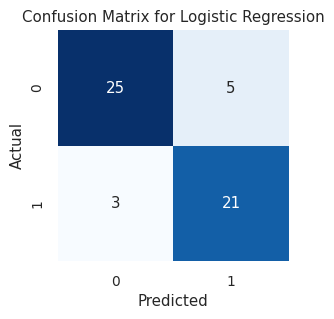

In [ ]:
confusion=confusion_matrix(y_test, logreg.predict(X_test))
plt.figure(figsize=(4, 3))
sns.set(font_scale=.9)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

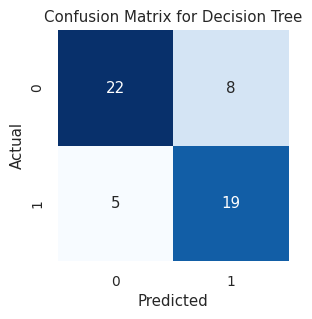

In [ ]:
confusion=confusion_matrix(y_test, dt.predict(X_test))
plt.figure(figsize=(4, 3))
sns.set(font_scale=.9)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()